In [2]:
print("hello world")

hello world


In [4]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

MINMAX SCALING

In [8]:
df=pd.read_csv("wine_data.csv",header=None,usecols=([0,1,2]))
df.columns=['class label','Alcohol','Mallic acid']

In [9]:
df

,class label,Alcohol,Mallic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

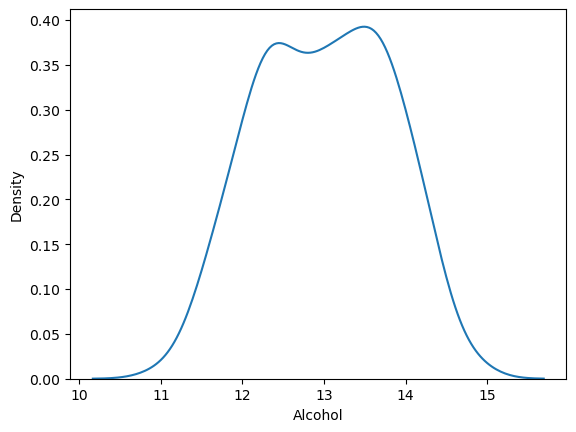

In [10]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Mallic acid', ylabel='Density'>

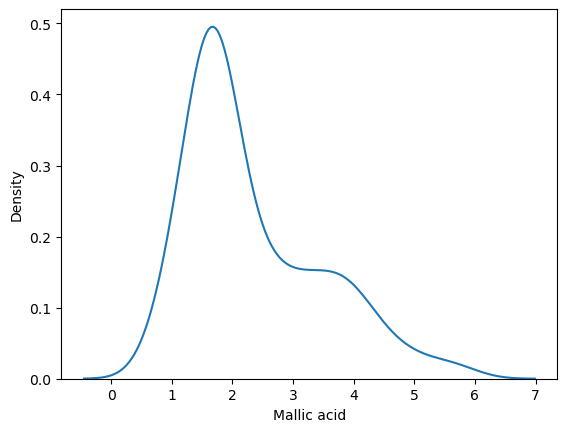

In [11]:
sns.kdeplot(df['Mallic acid'])

<Axes: xlabel='Alcohol', ylabel='Mallic acid'>

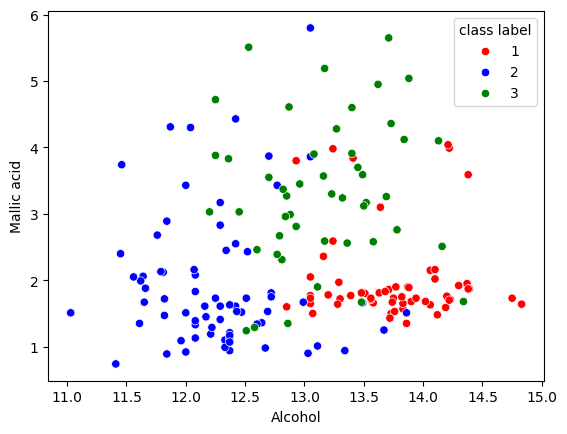

In [13]:
sns.scatterplot(data=df, x='Alcohol', y='Mallic acid', hue='class label', palette=color_dict)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('class label',axis=1),
                                              df['class label'],
                                               test_size=0.3,
                                               random_state=0
                                              )
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)
#transform train and test set
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [24]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [25]:
np.round(x_train.describe(),1)

,Alcohol,Mallic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [27]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Mallic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


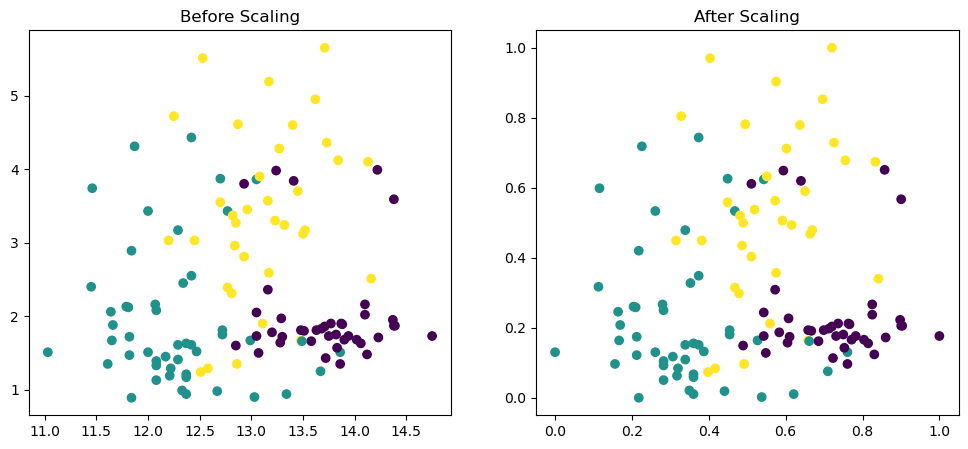

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Mallic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Mallic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()


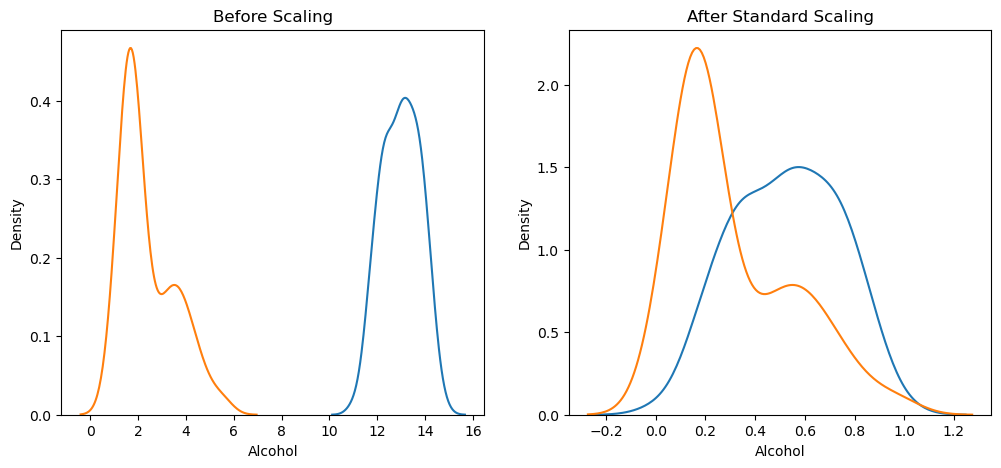

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Mallic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Mallic acid'], ax=ax2)
plt.show()

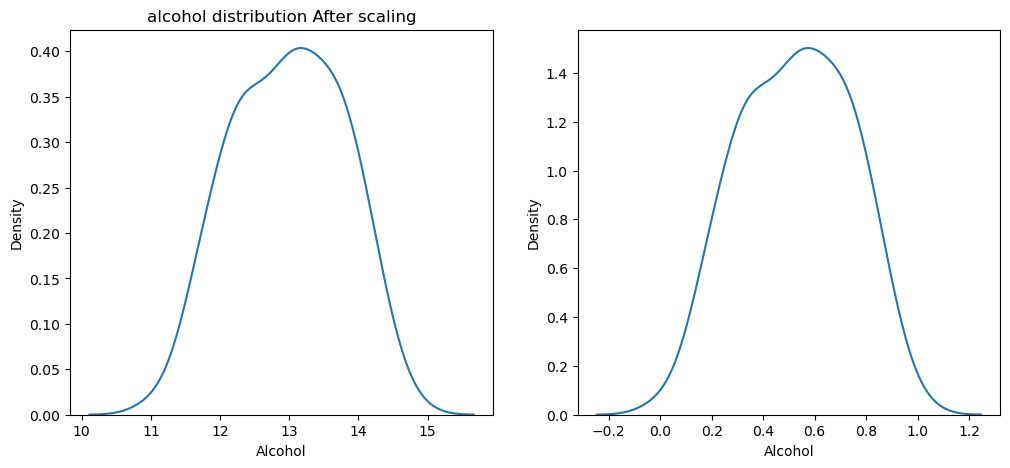

In [49]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('alcohol distribution before scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
#after scaling
ax1.set_title('alcohol distribution After scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
plt.show()

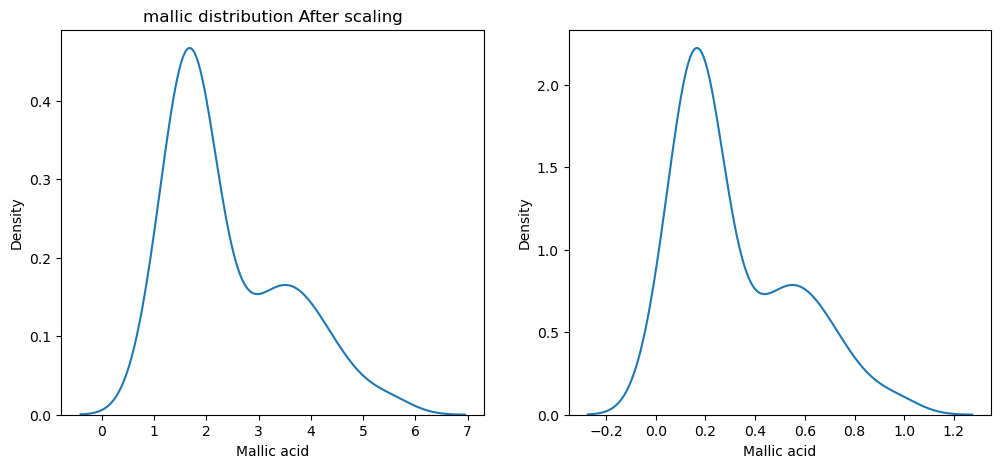

In [57]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('mallic distribution before scaling')
sns.kdeplot(x_train['Mallic acid'],ax=ax1)
#after scaling
ax1.set_title('mallic distribution After scaling')
sns.kdeplot(x_train_scaled['Mallic acid'],ax=ax2)
plt.show()

In [54]:
print(x_train.columns.tolist())


['Alcohol', 'Mallic acid']


ROBUST SCALING

X'(i)=(X(i)-X(median))/IQR
ROBUST TO OUTLIER
MOST QUESTION ARE SOLVED BY STANDARDIZATION
MINMAX USED N WHERE YOU KNOW THE MIN AND MAX VALUE 